In [1]:
pip install jupyterquiz

Note: you may need to restart the kernel to use updated packages.


In [6]:
from jupyterquiz import display_quiz
from IPython.display import HTML

In [7]:
# @hidden
git_path="https://raw.githubusercontent.com/aburousan/Intro2Astro/main/"
# ==============================

# Necessary script to hide the cell:
# ==============================
HTML('''<script>
  code_show=true; 
  function code_toggle() {
    if (code_show){
        $('.cm-comment:contains(@hidden)').closest('div.input').hide();
    } else {
        $('.cm-comment:contains(@hidden)').closest('div.input').show();
    }
    code_show = !code_show
  } 
  $( document ).ready(code_toggle);
</script>''')

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy import constants as const
from astropy import units as u
import math

## Question-1

Write a Simple python function to calculate Escape Velocity of any celestrial body. Calculate the value for earth.

What is Escape veloctiy? It is the minimum velocity needed to escape from gravitational binding. It is given by $$v = \sqrt{\frac{2GM}{R}}$$

In [70]:
def v(G,M,R):
    return np.sqrt(2 * G * M / R)

G = const.G
M = const.M_earth
R = const.R_earth

earth_escape_velocity = v(G,M,R)
print("Escape velocity from Earth is {:.2f}:".format(earth_escape_velocity))

Escape velocity from Earth is 11179.91 m / s:


In [71]:
display_quiz(git_path+"question1.json")#These are for interactive questions 

<IPython.core.display.Javascript object>

## Question-2 

Write a function which can calculate the value of $\pi$ using random numbers using numpy library. Try using 1000 sample

In [91]:
def pi(samples):
    inside_circle = 0
    
    for i in range(samples):
        x,y = np.random.rand(2)
        if x**2 + y**2 <= 1 :
            inside_circle += 1
    pi = (inside_circle/ samples)*4 
    return pi 

num_samples = 1000;
pi = pi(num_samples)
print(f"Estimated π with {num_samples} samples: {pi:.6f}")

Estimated π with 1000 samples: 3.132000


In [90]:
display_quiz(git_path+"question2.json", colors='fdsp')

<IPython.core.display.Javascript object>

## Question-3

Sum together every number from 0 to 10000 except for those than can be divided by 4 or 7. Do this using numpy.

In [9]:
numbers = np.arange(10001)
filtered_numbers = numbers[(numbers % 4 != 0) & (numbers % 7 != 0)]
result = np.sum(filtered_numbers)
print(result)

32147142


In [10]:
display_quiz(git_path+"question3.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-4

Consider the flower petal $r(\theta) = 1 + \frac{3}{4}\sin(3\theta)$ for $0\leq \theta <2\pi$.

1. Plot the shape.
2. Compute the area. If you guys don't know the formula. It is $A = \int_0^{2\pi} \frac{r^2}{2} d\theta$

In [11]:
from scipy.integrate import quad

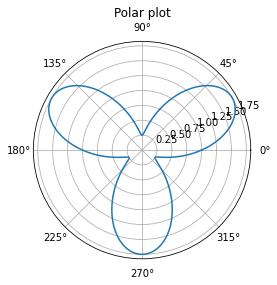

The area of the petal is approximately  4.0252


In [14]:
def polar_equation(theta):
    return 1 + (3/4) * np.sin(3 * theta)

theta = np.linspace(0,2 *np.pi, 1000)

x = polar_equation(theta)

plt.polar(theta, x)
plt.title("Polar plot")
plt.show()

def integrand(theta):
    return (polar_equation(theta)**2) / 2

area, _ = quad(integrand, 0, 2 *np.pi)

print(f"The area of the petal is approximately {area: .4f}")

In [19]:
display_quiz(git_path+"question4.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-5

Use Newton's Gravitational Law along with Newton's 2nd law of motion to write the differential equation which earth will follow due to Sun's gravity (sun is fixed in it's place).

1. Now use Scipy to solve the equation. The constants needed must be imported from Astropy.
2. Plot your solution , i.e., x-y plot.

Note: In the file $I$ is in $erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$. Take the estimated $\sigma$ error in the measurement to be $2\times 10^{-6}$$erg\cdot s^{-1}\cdot cm^{-1}\cdot sr^{-1}$.

In [20]:
#When error is known the way to use curve_fit is 
#para, pcov = curve_fit(x, y, fit_func, p0=(T0,), sigma=σ, absolute_sigma=True)

In [29]:
from scipy.integrate import odeint
from astropy.constants import G, M_sun
import astropy.units as u

In [32]:
def earth_motion(y, t):
    r = y[0]
    drdt = np.sqrt(G * M_sun / r**2)
    return [drdt]

initial_position = 1.496e11 * u.m  # Earth-Sun distance in meters
initial_state = [initial_position]

t = np.linspace(0, 365 * 24 * 3600, 1000)  # 365 days * 24 hours/day * 3600 seconds/hour

sol = odeint(earth_motion, initial_state, t)

earth_position = sol[:, 0]

# Plot the Earth's orbit
plt.plot(t, earth_position)
plt.xlabel('Time (seconds)')
plt.ylabel('Distance from Sun (meters)')
plt.title('Earth\'s Orbit around the Sun')
plt.grid(True)
plt.show()

TypeError: only dimensionless scalar quantities can be converted to Python scalars

## Question-6

**NASA Cosmic Background Explorer** (COBE) satellite carried an instrument, **FIRAS** (Far-Infrared Absolute Spectrophotometer) to measure the cosmic microwave background (CMB) radiation, which was confirmed to be distributed according to a black-body curve in accordance with the big bang theory:
$$ I(\nu, T) = \frac{2 h \nu^3 c^2}{\exp(\frac{hc\nu}{k_{b}T})-1}$$
where where the radiation frequency is expressed in wavenumbers, $cm^{-1}$, and the speed of light, c is taken to be in $cm-s^{-1}$.

The data file is cmb_data.txt, which contains measured $I(\nu)$ based on the FIRAS observations. Use scipy `curve_fit` to determine $T$, i.e., the Temperature parameter, along with error.

In [33]:
from scipy.optimize import curve_fit

optimized Temp (T): 0.9812280462287067 K
Temp Uncertinity: inf K


C:\Users\User\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


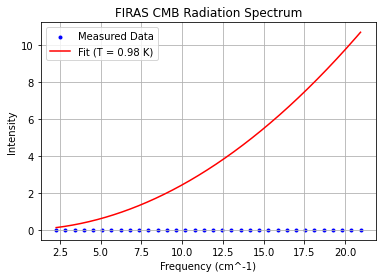

In [46]:
def black_body_radiation(nu, T):
    h = 6.62607015e-34
    c = 2.99792458e10
    k_b = 1.380649e-23
    
    return( 2 * h * nu**3 * c**2) / (np.exp((h * nu) / (k_b * T)) - 1)

data = np.loadtxt("cmb_data.txt", delimiter = None)

nu_data, I_data = data[:,0], data[:,1]

params, covariance = curve_fit(black_body_radiation, nu_data, I_data)

T_optimized = params[0]
T_uncertinity = np.sqrt(covariance[0,0])

print(f"optimized Temp (T): {T_optimized} K")
print(f"Temp Uncertinity: {T_uncertinity} K")

plt.scatter(nu_data, I_data, label = "Measured Data", marker = ".", color = "blue")
nu_fit = np.linspace(min(nu_data), max (nu_data), 1000)
I_fit = black_body_radiation(nu_fit, T_optimized)
plt.plot(nu_fit, I_fit, label = f"Fit (T = {T_optimized:.2f} K)", color = "red")
plt.xlabel("Frequency (cm^-1)")
plt.ylabel("Intensity")
plt.legend()
plt.title("FIRAS CMB Radiation Spectrum")
plt.grid(True)
plt.show()

In [44]:
display_quiz(git_path+"question6.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-7

Calculate the rest mass energy of a Proton in both joule and MeV.

If you want to get the list of constants present in AstroPy. Check the bottom of this link:https://docs.astropy.org/en/stable/constants/index.html

In [47]:
import astropy.constants as const

In [52]:
mass_proton_kg = const.m_p.value

rest_mass_energy_joules = (mass_proton_kg * const.c**2)

rest_mass_energy_mev = (rest_mass_energy_joules / 1.602176634e-13)

print(f"Rest mass energy of a proton:")
print(f"In joules: {rest_mass_energy_joules:.4e} J")
print(f"In MeV: {rest_mass_energy_mev:.4f} MeV")

Rest mass energy of a proton:
In joules: 1.5033e-10 m2 / s2 J
In MeV: 938.2721 m2 / s2 MeV


In [55]:
display_quiz(git_path+"question7.json", colors='fdsp')#These are for interactive questions

<IPython.core.display.Javascript object>

## Question-8

**Diurnal motion** is an astronomical term referring to the apparent motion of celestial objects (e.g. the Sun and stars) around Earth, or more precisely around the two celestial poles, over the course of one day.

It is caused by Earth's rotation around its axis, so almost every star appears to follow a circular arc path, called the diurnal circle,often depicted in star trail photography.

So, From the viewpoint of an observer on Earth, the apparent motion of an object on the celestrial sphere follows an arc above the horizon, which is called **diurnal arc**.

![Diurnal arc](https://webapps-cdn.esri.com/CDN/gis-dictionary/Media/diurnal-arc.gif)

![Diurnal_arc.jpeg](Diurnal_arc.jpeg)

Here, Diurnal Arc of a Star moving around the celestrial sphere(red line) in the horizontal system of an observer at lattitude $\phi$. Since, the equatorial plane is inclined by the angle $90^{\circ} - \phi$ against the horizontal plane, the upper culmination of the star at the meridian is given by $a_{max} = 90^{\circ} - \phi + \delta$, where $\delta$ is the declination. The star **rises** at hour angle $h_{rise}$, reaches it's highest altitude when it crosses the meridian at $h=0$ and sets at the horizon at $h_{set} = -h_{rise}$. The value can be given by,
$$ \cos(h_{rise}) = -\tan(\delta) \tan(\phi) $$

**Sidereal Time** is the time for which the star is visible on sky. It is given by $T = 2h_{set}$.

Let's see an example for our Mercury.

In [96]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.units as u
HG = SkyCoord.from_name("Mercury")
print(HG)
del_hg = HG.dec
print(del_hg)
obs = EarthLocation(lon = 88*u.deg + 22*u.arcmin + 49*u.arcsec,
                    lat = 22*u.deg + 29*u.arcmin + 28.3*u.arcsec)
phi = obs.lat
print(phi)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.79979287, 8.31153759)>
8d18m41.53532017s
22d29m28.3s


In [98]:
# Calculate h 
import math as m 
h = m.acos(-m.tan(del_hg.radian)*m.tan(phi.radian))
print("h = ", h)
T = (m.degrees(2*h)/360)*u.day
T_in_h = T.to(u.h)
print("T = ", T_in_h)

h =  1.6313193784557114
T =  12.462362056455593 h


If Sun was not there, we could have been able to see mercuary for 12.88 hours!!.

**Find** how long the star **Betelgeuse** is present on sky from my location (Jadavpur, Kolkata, India).

In [ ]:
display_quiz(git_path+"question8.json", colors="fdsp")

## Question-9

The **Declination** of sun $\delta_s$ is given by,
$$ \delta_s = -\arcsin\Bigg(\sin(\epsilon_0)\cos\Big(\frac{360}{365.24}(N+10)\Big)\Bigg)$$
where $\epsilon_0 = 23.44^{\circ}$ and $N$ is the difference in days starting from 1st january.

Make a plot of how the length of day changes over the year in your location.

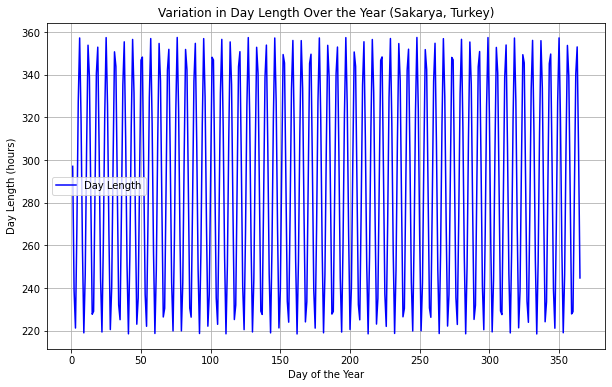

In [71]:
epsilon_0 = np.radians(23.44)  
latitude = np.radians(40.46)  
days_in_year = 365

days = np.arange(1, 366)

declination = -np.arcsin(np.sin(epsilon_0) * np.cos((360 / days_in_year) * (days + 10)))

day_length = 24 * (2 / 15) * np.degrees(np.arccos(-np.tan(latitude) * np.tan(declination)))

plt.figure(figsize=(10, 6))
plt.plot(days, day_length, label='Day Length', color='blue')
plt.xlabel('Day of the Year')
plt.ylabel('Day Length (hours)')
plt.title('Variation in Day Length Over the Year (Sakarya, Turkey)')
plt.grid(True)
plt.legend()
plt.show()


## Question-10

Now, let's play with some spectra. The spectra, we are going to use, was obtained at the 2.5m INT telescope and cover the range 3525-7500 Å (Sánchez-Blázquez et al. 2006) at 2.5 Å (FWHM) spectral resolution (Falcón-Barroso et al. 2011).

Plot the spectra from the fit file.

### Hints
<details>
<summary>How to get the wavelength?</summary>
CRPIX1  =                 1.00
    
CRVAL1  =            3500.0000 / central wavelength of first pixel
    
CDELT1  =             0.900000 / linear dispersion (Angstrom/pixel)
    
We have to use this three.
    
```import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

hdul = fits.open('name_of_file.fits')
data = hdul[0].data
h1 = hdul[0].header
obj_name = h1.get('OBJECT', 'Unknown')

flux = data[0]#your y
w = WCS(h1, naxis=1, relax=False, fix=False)
wv_am = w.wcs_pix2world(np.arange(len(flux)), 0)[0]#your x
```
</details>

In [56]:
import astropy.io.fits as fits

In [65]:
filename = "s0002.fits"
with fits.open(filename) as hdul: 
    spectrum_data = hdul[0].data

wavelength = spectrum_data["Format"]
flux = spectrum_data["Cards"]

plt.figure(figsize(10,10))
plt.plot(wavelength, flux, colour = "blue")
plt.xlabel("Wavelength (A)")
plt.ylabel("Flux")
plt.title("Spectrum from FITS table")
plt.grid(True)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

https://classic.sdss.org/dr6/algorithms/linestable.html
This link contains wavelengths and their corresponding element. Check from here.

In [66]:
display_quiz(git_path+"question10.json", colors='fdsp')

<IPython.core.display.Javascript object>